# LSTM과 GRU

## Further Question
- BPTT 이외에 RNN/LSTM/GRU의 구조를 유지하면서 gradient vanishing/exploding 문제를 완화할 수 있는 방법이 있을까요?
    - Gradient Clipping : 기울기 값을 자르는 것 (임계값을 넘지 않도록)
    - https://wikidocs.net/61375
- RNN/LSTM/GRU 기반의 Language Model에서 초반 time step의 정보를 전달하기 어려운 점을 완화할 수 있는 방법이 있을까요?

- RNN : ht = fw(ht-1, xt)

### LSTM 요약
- LSTM : ct, ht 두개가 전 time step에서 넘어오게됨 
    - ct-1 : Cell state (여기가 완전한 핵심 정보)
    - ht-1 : Hidden state (그 셀 스테이트에서 현재에 표현해야할 것에 가까운 것을 뽑은 것)
- LSTM의 4개 gate
    - f, i, g, o 로 순서대로 forget, input, gate, output이라는 이름을 가짐
    - f : 최초로 forget gate는 이전에서 핵심을 담아오는 cell state에서 잊을 부분을 약하게 만들어줌
        - 왜냐? forget gate는 xt와 ht-1의 W 가중치 연산을 한 것을 sigmoid 한 것이기 때문에 0~1사이 값으로 곱하면 그만큼 줄어들고 잊게됨
    - g, i : gate gate와 input gate의 곱으로 ht-1과 xt 사이에서 핵심적인 것을 뽑아서 cell state를 더하기로 업데이트 해줌
    - o : output gate로 최종 업데이트된 ct에서 최종 hidden output을 곱으로 결정해줌
    
### GRU 요약
- LSTM과 유사하지만 경량화해서 적은 메모리와 빠른 연산이 가능하도록 했음
- 입력으로 들어오는 것이 ht-1과 xt 만 들어오게 됨
- GRU의 ht-1은 LSTM의 ct-1과 유사한 역할을 함
- 성능은 LSTM과 유사함

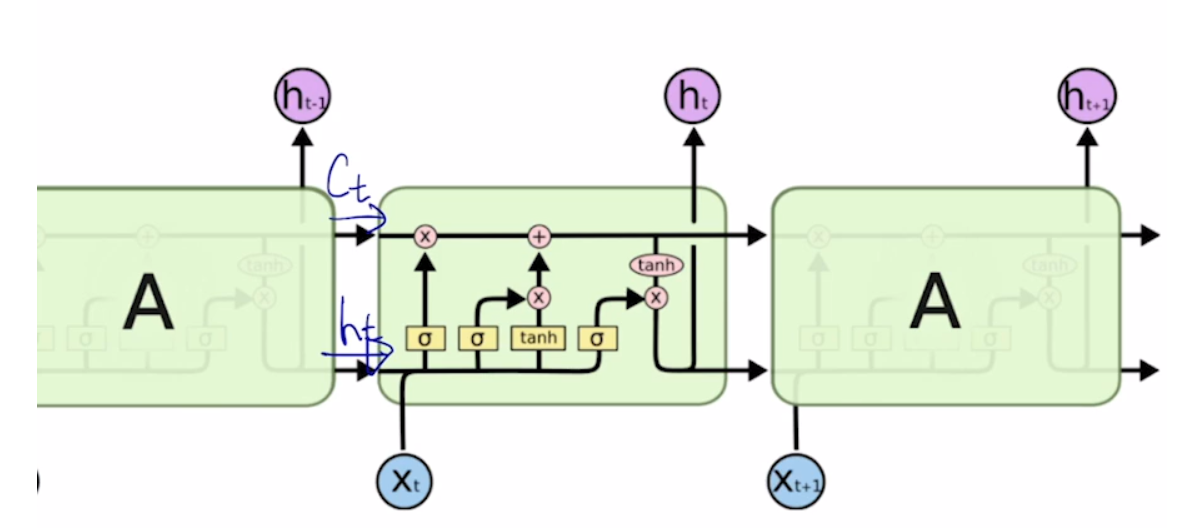

## LSTM
- Ct(Cell state vector) ht(hidden state vactor)를 입력으로 받음
- {ct, ht} = LSTM(xt, Ct-1, ht-1)
- i, f ,o ,g 가 아래에서 보듯이 최종 결과를 내는데 연산을 해주는 gate들임
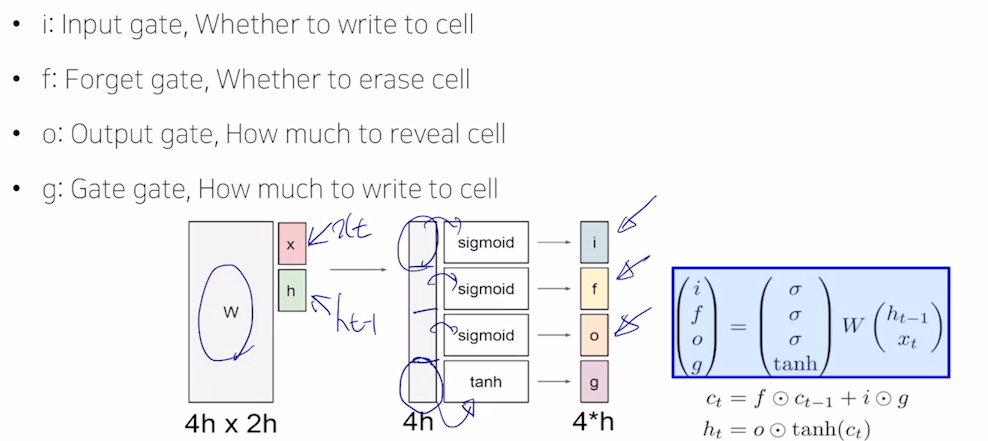
- ct-1 벡터 변환하는데 forget gate 사용됨
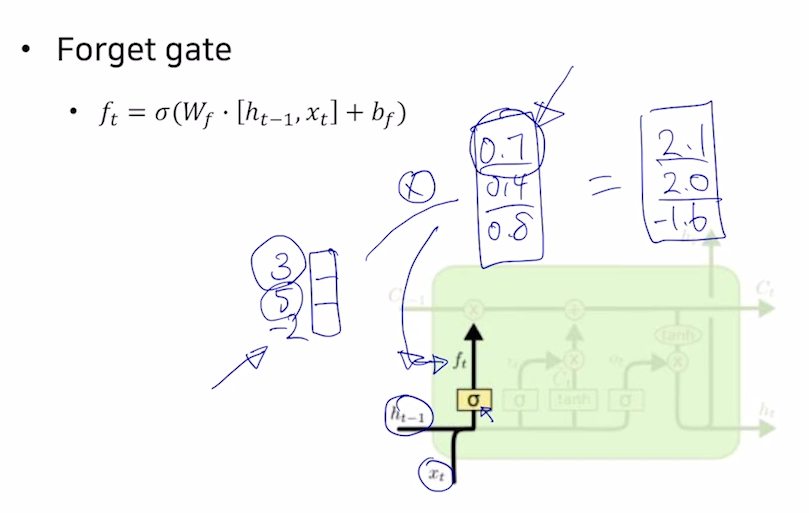
- g라는 gate gate는? : -1 ~ 1 사이의 값을 갖는데요, input gate와 변환해주게됨, 그리고 필요한 정보만 저장하고 넘겨줌
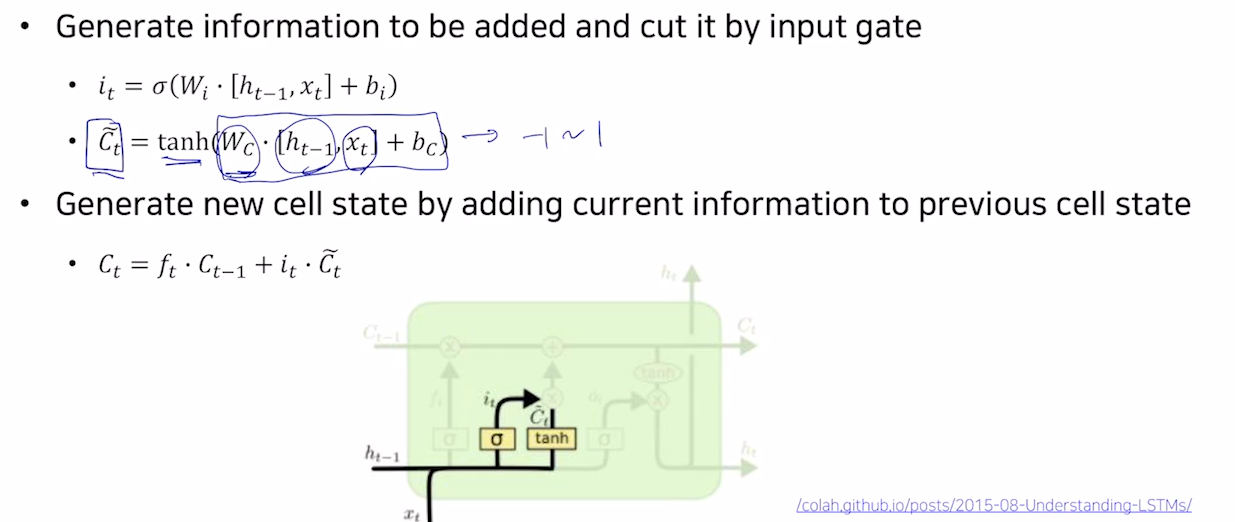
- ht를 만들 차례
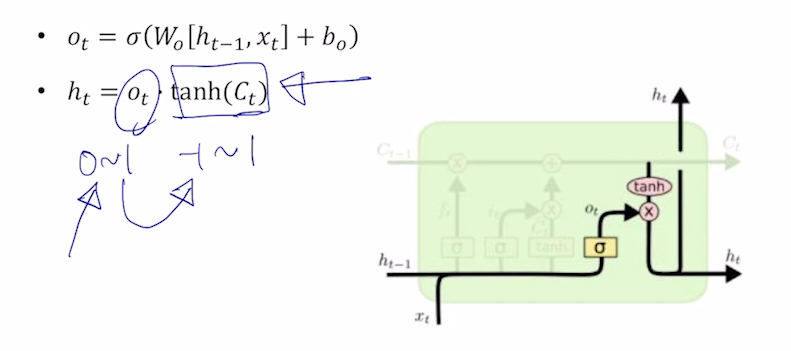

- 역할
    - ct는 기억해야할 모든 정보를 담고있음
    - ht는 예측값을 내야하는 output vector임, 즉 ct 중에서 지금당장 output 해야하는 정보를 빼낸 것
        - 예를들어 따음표가 열려있다는 정보는 지금 현재 ht에는 필요없지만 ct에는 남겨줘서 다음 연산에는 작동하도록 함

## GRU
- LSTM과 비교
    - 좀더 적은 메모리로, 좀더 빠르게 동작하도록 한 것
    - Cell state와 hidden state 벡터를 1원화 한것임
    - 전체 동작 원리는 LSTM과 유사함
- GRU 항목 역할
    - ht-1 포겟 게이트와 인풋 게이트로 만들던 것을 하나로 통합함
    - 1-를 이용해서 
    - LSTM과 더불어 많이 사용됨
    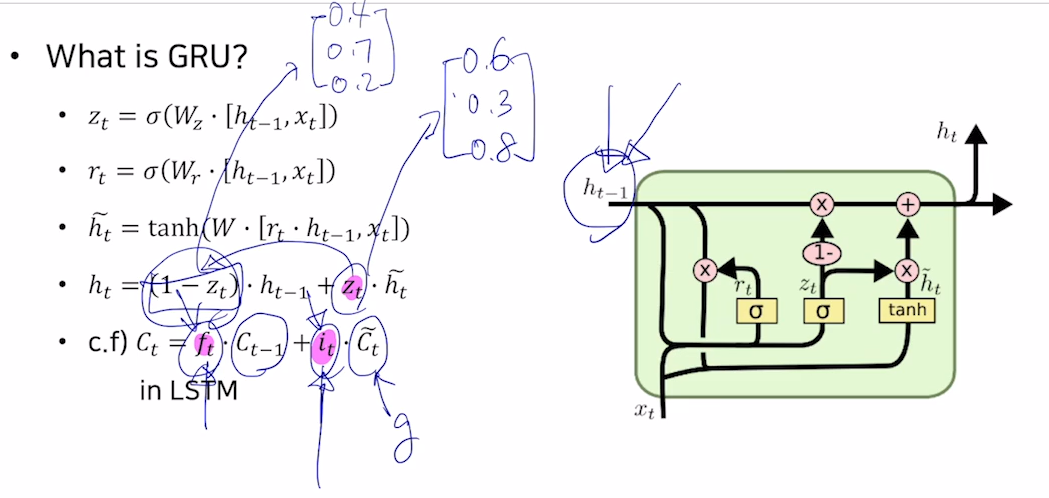

## Backpropagation LSTM GRU?
- 중간에 있는 덧셈 등을 이용하기 때문에 사라지지 않고 계속 유지되어 끝까지 전달 할 수 있음

# 정리 (RNN, LSTM, GRU)
- 구조를 유연하게 가능
- 그냥 RNN은 잘은 사용하지 않음 ( Gradiant Vanishing Explore 문제 )
- LSTM과 GRU를 이용해서 씀